# Linear Regression Using Pytorch

In [162]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [163]:
n = 50
X = torch.linspace(1,n, n).reshape(-1,1)
e = torch.randint(-15,16, (n, 1), dtype=torch.float)
y = 3*X + 5 + e

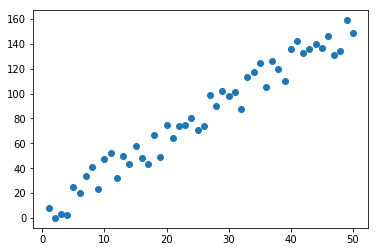

In [164]:
plt.scatter(X, y);

In [165]:
class Model(nn.Module):
    def __init__(self, n_in=1, n_out=1):
        super().__init__()
        self.linear = nn.Linear(n_in, n_out)
    
    def forward(self, x):
        return self.linear(x)

In [166]:
model = Model(n_in=1, n_out=1)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

In [167]:
epochs = 30
losses = []

for i in range(1, epochs+1):
    y_pred = model.forward(X)
    loss = criterion(y_pred, y)
    losses.append(loss)
    print(f'epoch: {i:2}    loss: {loss.item():6.3f}    weight: {model.linear.weight.item():6.3f}\
        bias: {model.linear.bias.item():6.3f}') 
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch:  1    loss: 5595.370    weight:  0.641        bias: -0.191
epoch:  2    loss: 2930.761    weight:  4.991        bias: -0.059
epoch:  3    loss: 1555.118    weight:  1.866        bias: -0.150
epoch:  4    loss: 844.921    weight:  4.111        bias: -0.081
epoch:  5    loss: 478.268    weight:  2.497        bias: -0.127
epoch:  6    loss: 288.976    weight:  3.657        bias: -0.090
epoch:  7    loss: 191.249    weight:  2.824        bias: -0.112
epoch:  8    loss: 140.794    weight:  3.422        bias: -0.092
epoch:  9    loss: 114.743    weight:  2.992        bias: -0.103
epoch: 10    loss: 101.291    weight:  3.301        bias: -0.092
epoch: 11    loss: 94.345    weight:  3.079        bias: -0.096
epoch: 12    loss: 90.756    weight:  3.238        bias: -0.089
epoch: 13    loss: 88.901    weight:  3.124        bias: -0.090
epoch: 14    loss: 87.940    weight:  3.206        bias: -0.085
epoch: 15    loss: 87.442    weight:  3.147        bias: -0.085
epoch: 16    loss: 87.183  

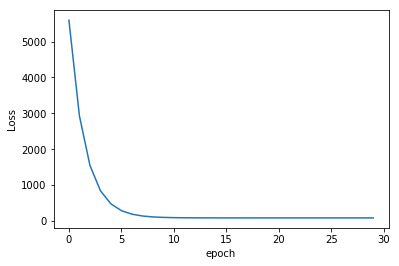

In [168]:
plt.plot(range(len(losses)), losses)
plt.ylabel('Loss')
plt.xlabel('epoch');

In [169]:
w,b = model.linear.weight.item(), model.linear.bias.item()
print(f'Current weight: {w:.4f}, Current bias: {b:.4f}')
x_test = np.array([X.min(),X.max()])
y_test = w*x_test + b

Current weight: 3.1702, Current bias: -0.0487


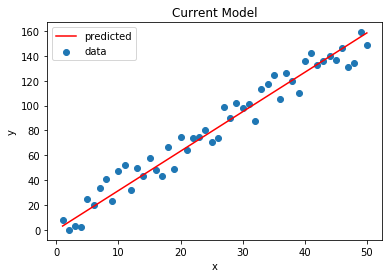

In [170]:
plt.scatter(X, y, label='data')
plt.plot(x_test,y_test,'r', label='predicted')
plt.title('Current Model')
plt.ylabel('y')
plt.xlabel('x')
plt.legend();